<a href="https://colab.research.google.com/github/sagr612/handwrittendigit/blob/main/HandWrittenDigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf                             
from matplotlib import pyplot as plt                        
import numpy as np
import cv2

In [ ]:
from keras.datasets import mnist
objects=mnist
(train_img,train_lab),(test_img,test_lab)=objects.load_data()

5


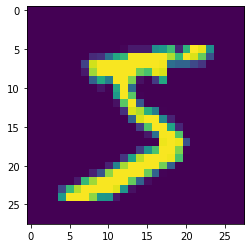

In [ ]:
plt.imshow(train_img[0])
print(train_lab[0])

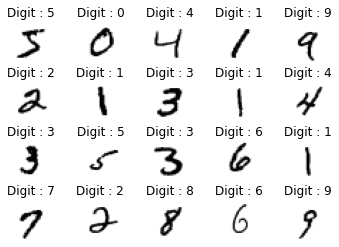

In [ ]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_img[i],cmap='gray_r')
  plt.title("Digit : {}".format(train_lab[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

In [ ]:
print('Training images shape : ',train_img.shape)
print('Testing images shape : ',test_img.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [ ]:
train_img=train_img/255.0
test_img=test_img/255.0

In [ ]:
print('How image looks like after normalising: ')
print(train_img[0])

How image looks like after normalising: 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0. 

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
model=Sequential()
input_layer= Flatten(input_shape=(28,28))
model.add(input_layer)
hidden_layer1=Dense(512,activation='relu')
model.add(hidden_layer1)
hidden_layer2=Dense(512,activation='relu')
model.add(hidden_layer2)
output_layer=Dense(10,activation='softmax')
model.add(output_layer)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dense_14 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compiling the sequential model
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.fit(train_img,train_lab,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0080 - accuracy: 0.9988
Epoch 2/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0124 - accuracy: 0.9983
Epoch 3/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0101 - accuracy: 0.9988
Epoch 4/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0077 - accuracy: 0.9988
Epoch 5/100
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0084 - accuracy: 0.9989
Epoch 6/100
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0093 - accuracy: 0.9988
Epoch 7/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0096 - accuracy: 0.9986
Epoch 8/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0064 - accuracy: 0.9991
Epoch 9/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0109 - accuracy: 0.9985
Epoch 10/100
1875/1875 [==============================] - 14s 7m

In [ ]:
model.save('/content/drive/MyDrive/models_ML/hand1.h5')

In [ ]:
loss_and_acc=model.evaluate(test_img,test_lab,verbose=2)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 - 1s - loss: 0.8388 - accuracy: 0.9836 - 785ms/epoch - 3ms/step
Test Loss 0.8388497829437256
Test Accuracy 0.9836000204086304


Predicted Value:  7
Successful prediction


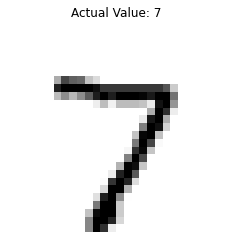

In [ ]:
plt.imshow(test_img[0],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[0]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[0]))
if(test_lab[0]==(np.argmax(prediction[0]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

Predicted Value:  2
Successful prediction


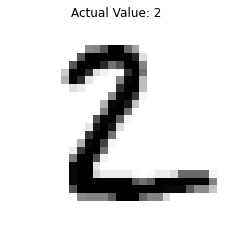

In [ ]:
plt.imshow(test_img[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[1]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(test_lab[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [265]:
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
  x=uploaded[filename]
img=cv2.imread(filename,cv2.IMREAD_UNCHANGED)

Saving dee.png to dee.png


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Actual no = 1
predicted value :  1
Successful


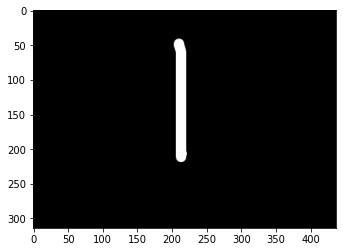

In [266]:
img=load_image(filename)
label=int(input('Actual no = '))
predict=model.predict(img)
classify=np.argmax(predict)
print('predicted value : ',classify)
if(label==(np.argmax(predict))):
  print("Successful")
else:
  print("Not Successful")
show=cv2.imread(filename)
plt.imshow(show)